In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_roc_curve

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

**DATA IMPORT, DESCRIPTION AND PREPROCESSING**

In [85]:
df=pd.read_csv("/kaggle/input/health-insurance-dataset/train.csv",index_col=0)
df_train=df.copy()
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [86]:
df_train.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [88]:
#check if the dataframe has NaN values
df_train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [89]:
df_train["Gender"].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [90]:
df_train["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [91]:
df_train["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [92]:
df_train["Region_Code"].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [93]:
df_train["Policy_Sales_Channel"].value_counts()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

In [5]:
#One Hot Encoding on categorical features "Gender","Vehicle_Age","Vehicle_Damage" (they don't have many categories)
#dropping the first category, being strictly correlated to the others
#Gain: lower correlation problems and dataset dimensionality
to_dummies=["Gender","Vehicle_Age","Vehicle_Damage"]
df_train=pd.get_dummies(df_train,columns=to_dummies,drop_first=True)
df_train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
id,,,,,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [6]:
#Target encoder for features "Region_Code" and "Policy_Sales_Channel" (they have many categories)
#to avoid increasing the dataset dimensionality (a new feature for each unique category would create a huge number of additional columns)
#each category is substituted with the mean target value for samples which have that category
x=df_train["Region_Code"].map(str)
y=df_train["Response"]
te=TargetEncoder()
df_train["Region_Code_te"]=te.fit_transform(x,y)

x=df_train["Policy_Sales_Channel"].map(str)
y=df_train["Response"]
te=TargetEncoder()
df_train["Policy_Sales_Channel_te"]=te.fit_transform(x,y)

df_train.head()

/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_te,Policy_Sales_Channel_te
id,,,,,,,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1,0.187163,0.199385
2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0,0.127662,0.199385
3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1,0.187163,0.199385
4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0,0.112760,0.028624
5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0,0.121776,0.028624


In [7]:
#drop the two previous features not encoded avoiding redundant features
df_train=df_train.drop(["Region_Code","Policy_Sales_Channel"],axis=1)
df_train.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_te,Policy_Sales_Channel_te
id,,,,,,,,,,,,
1,44,1,0,40454.0,217,1,1,0,1,1,0.187163,0.199385
2,76,1,0,33536.0,183,0,1,0,0,0,0.127662,0.199385
3,47,1,0,38294.0,27,1,1,0,1,1,0.187163,0.199385
4,21,1,1,28619.0,203,0,1,1,0,0,0.112760,0.028624
5,29,1,1,27496.0,39,0,0,1,0,0,0.121776,0.028624


In [8]:
#Create the array of features and target
X=df_train.drop("Response",axis=1).values
y=df_train["Response"].values

In [9]:
def plot_confusion_matrix(y_true,y_pred, labels=["Negative Response","Positive Response"],show_precision_recall=False):
    """
    function that plots the confusion matrix of a binary classification through a heatmap
    """
    cm=confusion_matrix(y_true,y_pred)
    df_cm=pd.DataFrame(cm, 
                       index=labels,
                       columns=["Predicted " + labels[0],"Predicted " + labels[1]]
                      )
    plt.figure(figsize=(10, 8), dpi=80)
    hm=sns.heatmap(df_cm, annot=True,fmt="g")
    
    if show_precision_recall:
        plt.text(0,-0.1,f"Precision: {cm[1][1]/(cm[1][1]+cm[0][1]):.4f}")
        plt.text(1,-0.1,f"Recall: {cm[1][1]/(cm[1][1]+cm[1][0]):.4f}")
    plt.show()

**MODEL 1: SIMPLE LOGISTIC REGRESSION**

*This is the first model analyzed: it will be the base case*

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

#standardization
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

*CONFUSION MATRIX*

TRAIN SET


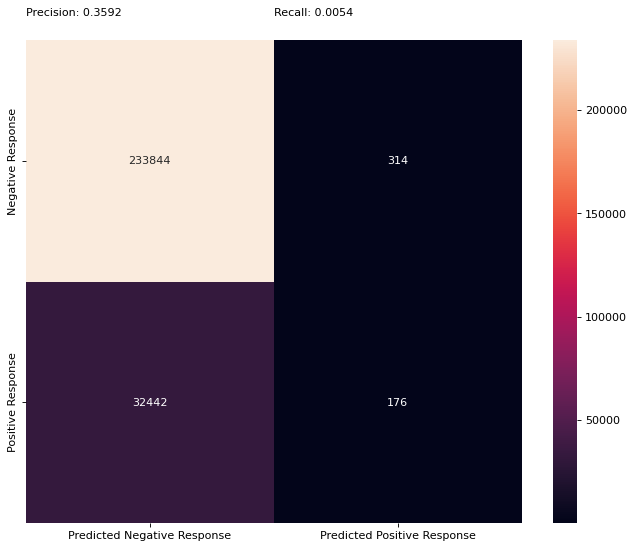

TEST SET


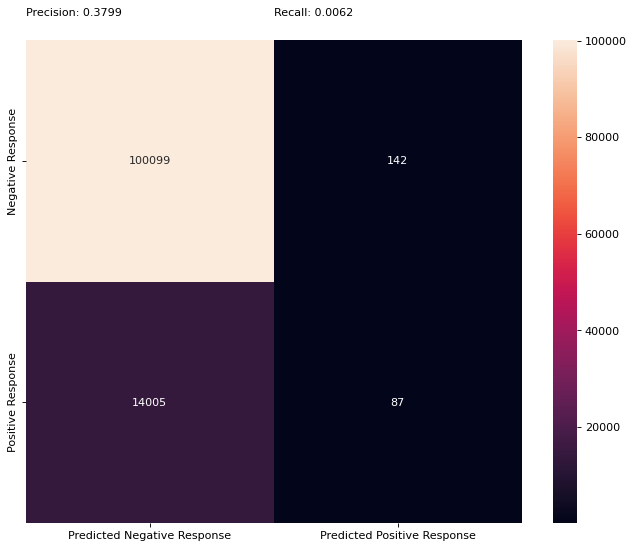

In [11]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

*CLASSIFICATION REPORT*

In [12]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

           0     0.8782    0.9987    0.9345    234158
           1     0.3592    0.0054    0.0106     32618

    accuracy                         0.8772    266776
   macro avg     0.6187    0.5020    0.4726    266776
weighted avg     0.8147    0.8772    0.8216    266776

TEST SET
              precision    recall  f1-score   support

           0     0.8773    0.9986    0.9340    100241
           1     0.3799    0.0062    0.0121     14092

    accuracy                         0.8763    114333
   macro avg     0.6286    0.5024    0.4731    114333
weighted avg     0.8160    0.8763    0.8204    114333



*ROC CURVE*

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


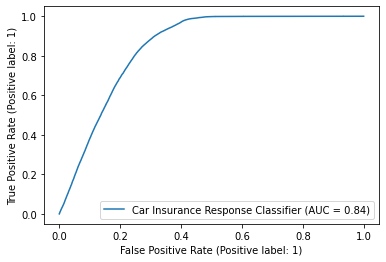

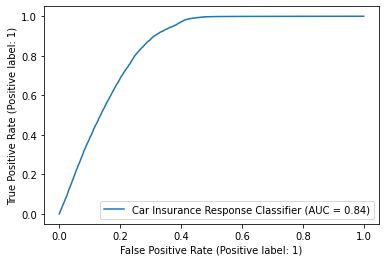

In [13]:
plot_roc_curve(lr,X_train,y_train, name="Car Insurance Response Classifier")
plot_roc_curve(lr,X_test,y_test, name="Car Insurance Response Classifier")

NOTES: The accuracy is high, but precision and recall are really bad! 

That's usually due to an imbalanced dataset: in the case of class imbalance problems, the issue is that the algorithm will be more biased towards predicting the majority class. The algorithm will not have enough data to learn the patterns present in the minority class.
As a consequence, the model would be "dumb": it would predict every new data as belonging to the majority class, leading to a high accuracy, but with precision and recall scores really low. 

Let's check if target data of train set are unbalanced as expected...

In [14]:
# It seems so...
counts=df_train["Response"].value_counts()
print(f"{counts[1]} positive responses (Percentage: {counts[1]/counts.sum()*100:.2f}%)")
print(f"{counts[0]} negative responses (Percentage: {counts[0]/counts.sum()*100:.2f}%)")

46710 positive responses (Percentage: 12.26%)
334399 negative responses (Percentage: 87.74%)


**MODEL 2: LOGISTIC REGRESSION + CLASS-WEIGHT BALANCED**

*Determined the set is imbalanced, one significant method to improve the model would be the "class-weight balanced" one. This improvement can be achieved by giving different weights to both the majority and minority classes. The purpose is to penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class.*

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

lr=LogisticRegression(class_weight="balanced")
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

*CONFUSION MATRIX*

TRAIN SET


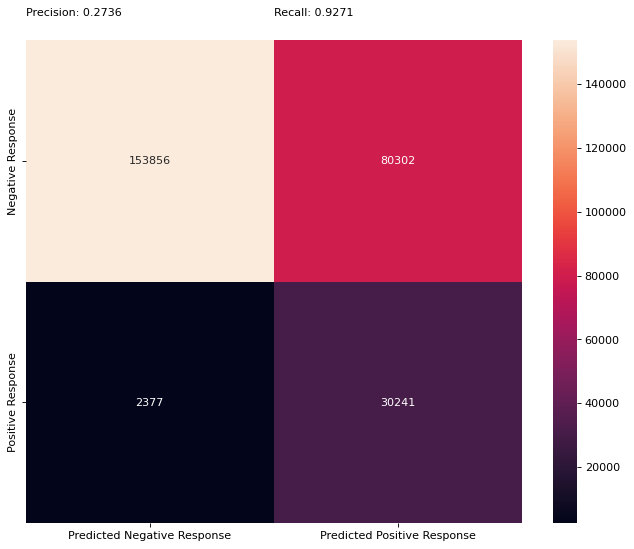

TEST SET


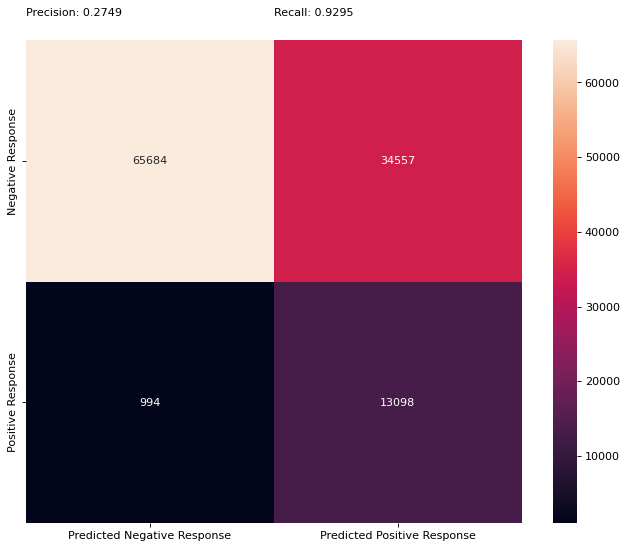

In [16]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

In [17]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

           0     0.9848    0.6571    0.7882    234158
           1     0.2736    0.9271    0.4225     32618

    accuracy                         0.6901    266776
   macro avg     0.6292    0.7921    0.6053    266776
weighted avg     0.8978    0.6901    0.7435    266776

TEST SET
              precision    recall  f1-score   support

           0     0.9851    0.6553    0.7870    100241
           1     0.2749    0.9295    0.4242     14092

    accuracy                         0.6891    114333
   macro avg     0.6300    0.7924    0.6056    114333
weighted avg     0.8976    0.6891    0.7423    114333



*ROC CURVE*

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


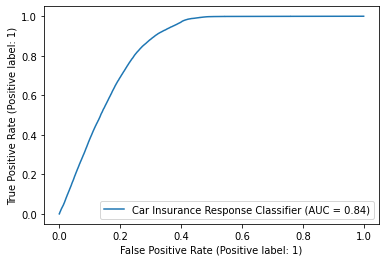

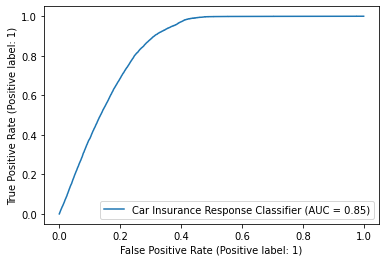

In [18]:
plot_roc_curve(lr,X_train,y_train, name="Car Insurance Response Classifier")
plot_roc_curve(lr,X_test,y_test, name="Car Insurance Response Classifier")

NOTES: With the "Class-weight Balanced" method, a higher weight is given to the minority target (positive response). It can be observed a mixed result on the scores: recall is much better (less false negative predictions), but precision is lower (more false positive predictions) and accuracy has decreased too. 

We should highlight the importance of having a high recall, even if the precision is low: some client's response could be falsely predicted as positive (low precision), but the most important goal is not to lose interested clients, reducing as much as possible the false negative predictions (high recall) and consequently resulting in solid savings for the company. So let's focus on Recall score values!

Accuracy ≃ 0.69
Precision ≃ 0.27
Recall ≃ 0.93
F1 Score ≃ 0.42

N.B. a manual approach to assign different weights to minority and majority classes may give even better results in terms of recall

Let's try oversampling & undersampling methods, used for unbalanced sets as well...

TRAIN SET


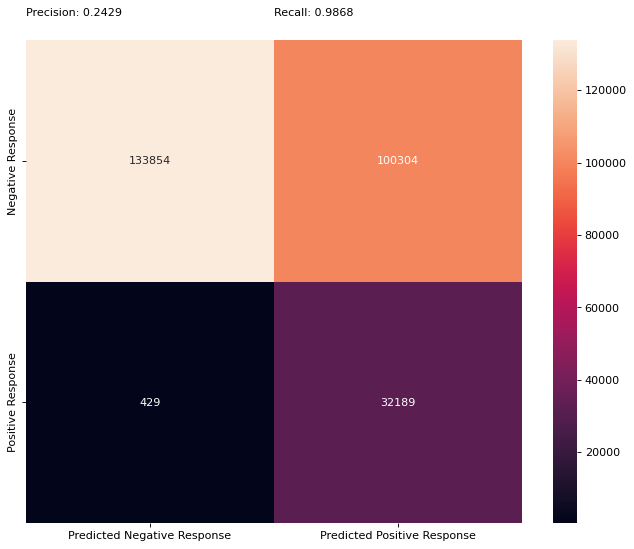

TEST SET


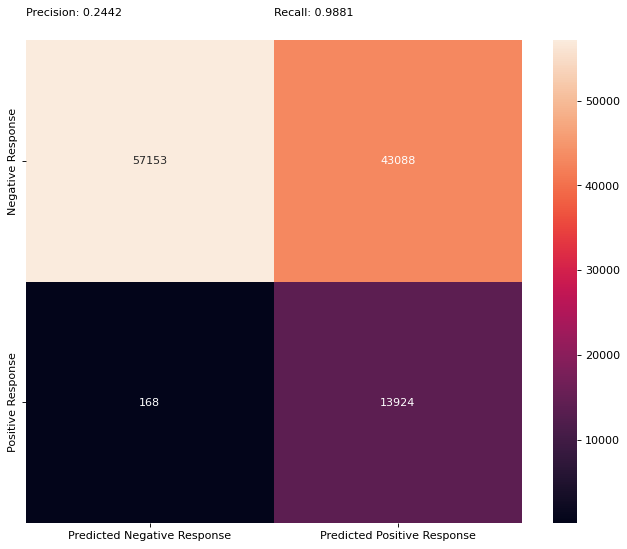

In [64]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

lr=LogisticRegression(class_weight={0:5,1:100})
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

**MODEL 3: LOGISTIC REGRESSION + OVERSAMPLING (SAMPLING STRATEGY = "MINORITY")**

*This method randomly duplicates samples from the minority category and adds them to the train set.
It might be useful to tune the target class distribution (that we have seen to be unbalanced towards the "Negative Response"). A negative effect could happen when trying to oversample a severely imbalanced dataset to reach a balanced distribution: it may increase the likelihood of occurring overfitting, since it makes exact copies of the minority class examples, leading to increased generalization error.
By default, the sampling strategy is "minority" (ratio minority/majority=1), meaning that the minority category's observations are oversampled to reach the observations' number of the majority category.* 

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

ros=RandomOverSampler(sampling_strategy="minority",random_state=0)
X_train,y_train=ros.fit_resample(X_train,y_train)

lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

*CONFUSION MATRIX*

TRAIN SET


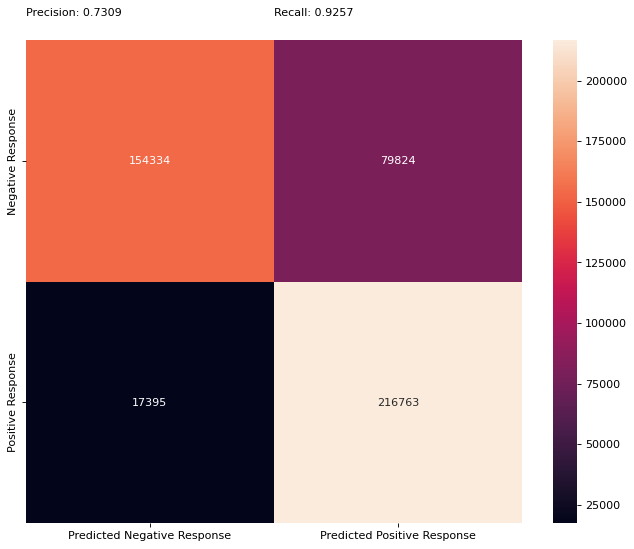

TEST SET


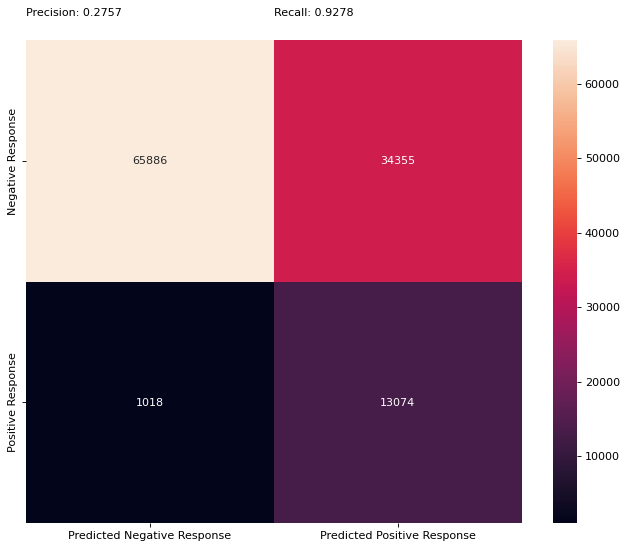

In [20]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

*CLASSIFICATION REPORT*

In [21]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

           0     0.8987    0.6591    0.7605    234158
           1     0.7309    0.9257    0.8168    234158

    accuracy                         0.7924    468316
   macro avg     0.8148    0.7924    0.7887    468316
weighted avg     0.8148    0.7924    0.7887    468316

TEST SET
              precision    recall  f1-score   support

           0     0.9848    0.6573    0.7884    100241
           1     0.2757    0.9278    0.4250     14092

    accuracy                         0.6906    114333
   macro avg     0.6302    0.7925    0.6067    114333
weighted avg     0.8974    0.6906    0.7436    114333



*ROC CURVE*

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


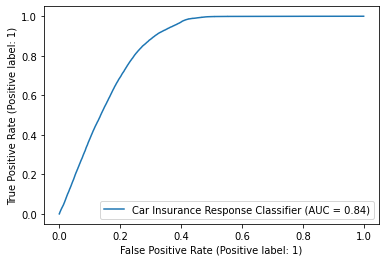

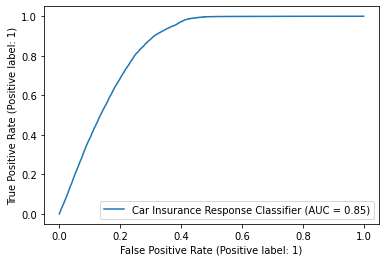

In [22]:
plot_roc_curve(lr,X_train,y_train, name="Car Insurance Response Classifier")
plot_roc_curve(lr,X_test,y_test, name="Car Insurance Response Classifier")

NOTES: With the "Oversampling" method parameters practicaly do not change:

Accuracy ≃ 0.69
Precision ≃ 0.28
Recall ≃ 0.93
F1 Score ≃ 0.42

Let's try the Undersampling method...

**MODEL 4: LOGISTIC REGRESSION + UNDERSAMPLING (SAMPLING STRATEGY = "MAJORITY")**

*This method randomly selects samples from the majority category deleting them from the train set.
It seems to be more suitable for imbalanced targets with still a decent amount of samples in the minority class.
A drawback of this method is that undersampling the majority class could lead to loss of samples significant for the fitting of a robust decision boundary.
By default, the sampling strategy is "majority" (ratio minority/majority=1), meaning that the majority category's observations are undersampled to reach the observations' number of the minority category.*

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

rus=RandomUnderSampler(sampling_strategy="majority",random_state=0)
X_train,y_train=rus.fit_resample(X_train,y_train)

lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

*CONFUSION MATRIX*

TRAIN SET


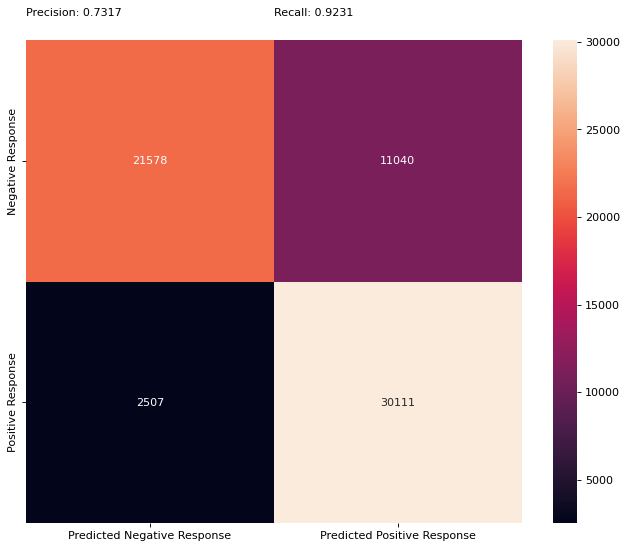

TEST SET


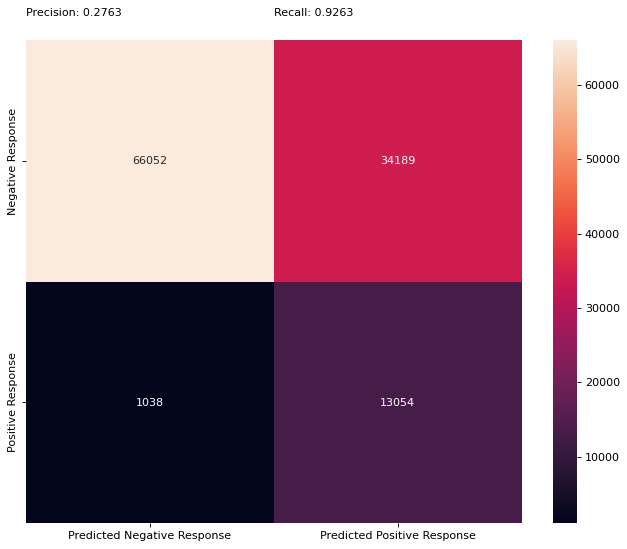

In [24]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

*CLASSIFICATION REPORT*

In [25]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

           0     0.8959    0.6615    0.7611     32618
           1     0.7317    0.9231    0.8164     32618

    accuracy                         0.7923     65236
   macro avg     0.8138    0.7923    0.7887     65236
weighted avg     0.8138    0.7923    0.7887     65236

TEST SET
              precision    recall  f1-score   support

           0     0.9845    0.6589    0.7895    100241
           1     0.2763    0.9263    0.4257     14092

    accuracy                         0.6919    114333
   macro avg     0.6304    0.7926    0.6076    114333
weighted avg     0.8972    0.6919    0.7446    114333



*ROC CURVE*

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


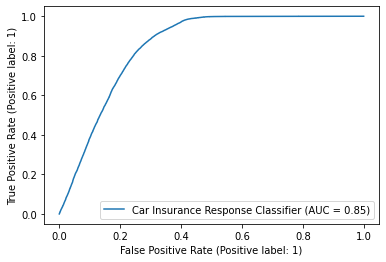

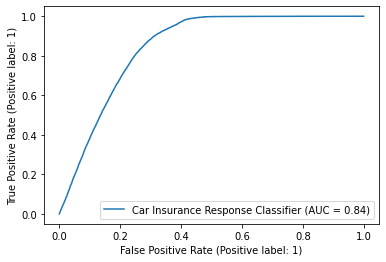

In [26]:
plot_roc_curve(lr,X_train,y_train, name="Car Insurance Response Classifier")
plot_roc_curve(lr,X_test,y_test, name="Car Insurance Response Classifier")

NOTES: With the "Undersampling" method the test set scores are practically equal to the Oversampling ones. 

Accuracy ≃ 0.69
Precision ≃ 0.28
Recall ≃ 0.93
F1 Score ≃ 0.43

Let's find out if "minority" and "majority" strategy ratios are the optimal ones...

In [27]:
def plot_scores(model,sampling_range=(0.5,1.0,6)):
    
    """
    function that finds the best accuracy, precision and recall scores and plots their behaviours for Oversampling and Undersampling methods
    within a range of sampling strategy parameters put by default in the range between 0.5 and 1 with step 0.1.
    To change these values: sampling_range=tuple(start,end,number of steps)
    To exclued the end: number of steps=(end-start)/step
    To inclued the end: number of steps=((end-start)+step)/step 
    """
    
    best_scores={"Accuracy":0,"Precision":0,"Recall":0, "F1 Score":0}
    k_acc,k_pre,k_rec,k_f1=0,0,0,0
    
    accuracy_scores=[]
    precision_scores=[]
    recall_scores=[]
    f1_scores=[]
    
    for k in np.linspace (sampling_range[0],sampling_range[1],sampling_range[2]):

        X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

        ss=StandardScaler()
        X_train=ss.fit_transform(X_train)
        X_test=ss.transform(X_test)
        
        rs=model(sampling_strategy=k,random_state=0)
        X_train,y_train=rs.fit_resample(X_train,y_train)

        lr=LogisticRegression()
        lr.fit(X_train,y_train)

        y_pred_train=lr.predict(X_train)
        y_pred_test=lr.predict(X_test)

        cm=confusion_matrix(y_test,y_pred_test)

        accuracy_score=(cm[1][1]+cm[0][0])/(cm[1][1]+cm[0][0]+cm[0][1]+cm[1][0])
        precision_score=cm[1][1]/(cm[1][1]+cm[0][1])
        recall_score=cm[1][1]/(cm[1][1]+cm[1][0])
        f1_score=2*(precision_score*recall_score)/((precision_score+recall_score))
        
        accuracy_scores.append(accuracy_score)
        precision_scores.append(precision_score)
        recall_scores.append(recall_score)
        f1_scores.append(f1_score)

        if accuracy_score>best_scores["Accuracy"]:
            best_scores["Accuracy"]=accuracy_score
            k_acc=k
        if precision_score>best_scores["Precision"]:
            best_scores["Precision"]=precision_score
            k_pre=k
        if recall_score>best_scores["Recall"]:
            best_scores["Recall"]=recall_score
            k_rec=k 
        if f1_score>best_scores["F1 Score"]:
            best_scores["F1 Score"]=f1_score
            k_f1=k

    print(f"Best accuracy score: {best_scores['Accuracy']:.4f} for sampling strategy = {round(k_acc,1)}")
    print(f"Best precision score: {best_scores['Precision']:.4f} for sampling strategy = {round(k_pre,1)}") 
    print(f"Best recall score: {best_scores['Recall']:.4f} for sampling strategy = {round(k_rec,1)}")
    print(f"Best f1 score score: {best_scores['F1 Score']:.4f} for sampling strategy = {round(k_f1,1)}\n")
    
    sampling_range=np.linspace (sampling_range[0],sampling_range[1],sampling_range[2])
    plt.figure(figsize=(10, 8), dpi=80)
    plt.xlabel("Sampling strategy")
    plt.ylabel("Scores")
    plt.title(model.__name__)
    plt.plot(sampling_range,accuracy_scores,marker="o",label="Accuracy")
    plt.plot(sampling_range,precision_scores,marker="o",label="Precision")
    plt.plot(sampling_range,recall_scores,marker="o",label="Recall")
    plt.plot(sampling_range,f1_scores,marker="o",label="F1 score")
    plt.legend()

Best accuracy score: 0.8715 for sampling strategy = 0.2
Best precision score: 0.3548 for sampling strategy = 0.3
Best recall score: 0.9278 for sampling strategy = 1.0
Best f1 score score: 0.4492 for sampling strategy = 0.5



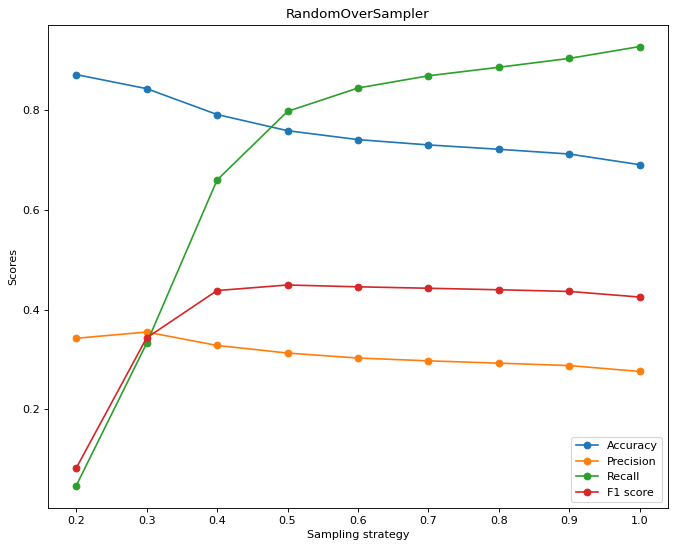

In [28]:
plot_scores(RandomOverSampler,sampling_range=(0.2,1.0,9))

NOTES: The loop on the oversampling strategy parameter confirms that the best recall score is obtained for sampling strategy = "minority". It's interesting see how Recall curve continues growing, while Precision and Accuracy continuously decreases

Best accuracy score: 0.8715 for sampling strategy = 0.2
Best precision score: 0.3542 for sampling strategy = 0.3
Best recall score: 0.9263 for sampling strategy = 1.0
Best f1 score score: 0.4490 for sampling strategy = 0.5



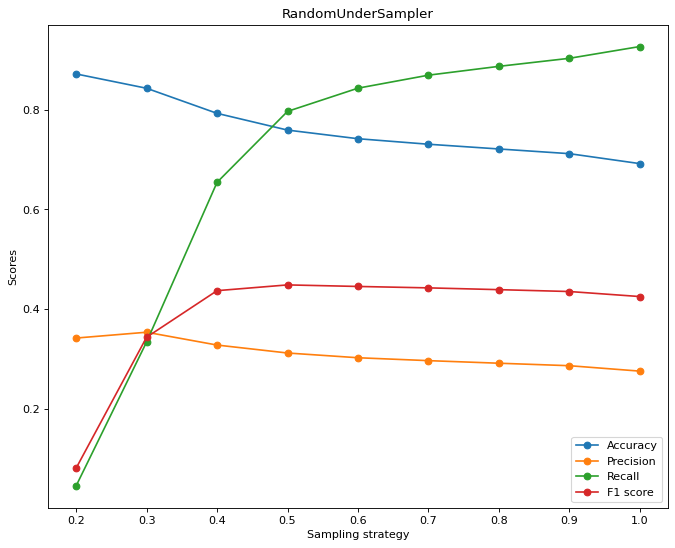

In [29]:
plot_scores(RandomUnderSampler,sampling_range=(0.2,1.0,9))

NOTES: The loop on the undersampling strategy parameter confirms that the best recall score is obtained for sampling strategy = "majority". It's interesting see how Recall curve continues growing, while Precision and Accuracy continuously decreases

Let's now try to find a better Recall score through a combined oversampling and undersampling method...

**MODEL 5: LOGISTIC REGRESSION + COMBINED OVERSAMPLING & UNDERSAMPLING**

In [40]:
def plot_recall_combined_sampling():
    
    """
    function that plots the f1 score behaviour for Oversampling (1° method applied) and Undersampling (2° method applied) methods
    within specific sampling strategy ratio ranges
    """
    
    recall_scores={}
    plt.figure(figsize=(14, 12), dpi=80)
    over_sampling_range=(0.2,0.5,4)
    under_sampling_range=(0.5,1,6)
    
    for j in np.linspace (over_sampling_range[0],over_sampling_range[1],int(over_sampling_range[2])):
        
        X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

        ss=StandardScaler()
        X_train=ss.fit_transform(X_train)
        X_test=ss.transform(X_test)
        
        ros=RandomOverSampler(sampling_strategy=j,random_state=0)
        X_train,y_train=ros.fit_resample(X_train,y_train)
        
        recall_k=[]
        
        for k in np.linspace (under_sampling_range[0],under_sampling_range[1],int(under_sampling_range[2])):

            rus=RandomUnderSampler(sampling_strategy=k,random_state=0)
            X_train,y_train=rus.fit_resample(X_train,y_train)

            lr=LogisticRegression()
            lr.fit(X_train,y_train)

            y_pred_train=lr.predict(X_train)
            y_pred_test=lr.predict(X_test)

            cm=confusion_matrix(y_test,y_pred_test)

            accuracy_score=(cm[1][1]+cm[0][0])/(cm[1][1]+cm[0][0]+cm[0][1]+cm[1][0])
            precision_score=cm[1][1]/(cm[1][1]+cm[0][1])
            recall_score=cm[1][1]/(cm[1][1]+cm[1][0])

            
            #f1_k.append(round(2*(precision_score*recall_score)/((precision_score+recall_score)),4))
            recall_k.append(recall_score)
            recall_scores[j]=recall_k
        
        x_axis=np.linspace(under_sampling_range[0],under_sampling_range[1],under_sampling_range[2])
        
        plt.xlabel("Undersampling strategy")
        plt.ylabel("Recall scores")
        plt.title("Oversampling and Undersampling - combined methods")
        plt.plot(x_axis,recall_scores[j],marker="o",label=f"Recall score for Oversampling strategy = {j} - Recall Score max = {max(recall_scores[j])}")
        plt.legend()
        
    plt.show()

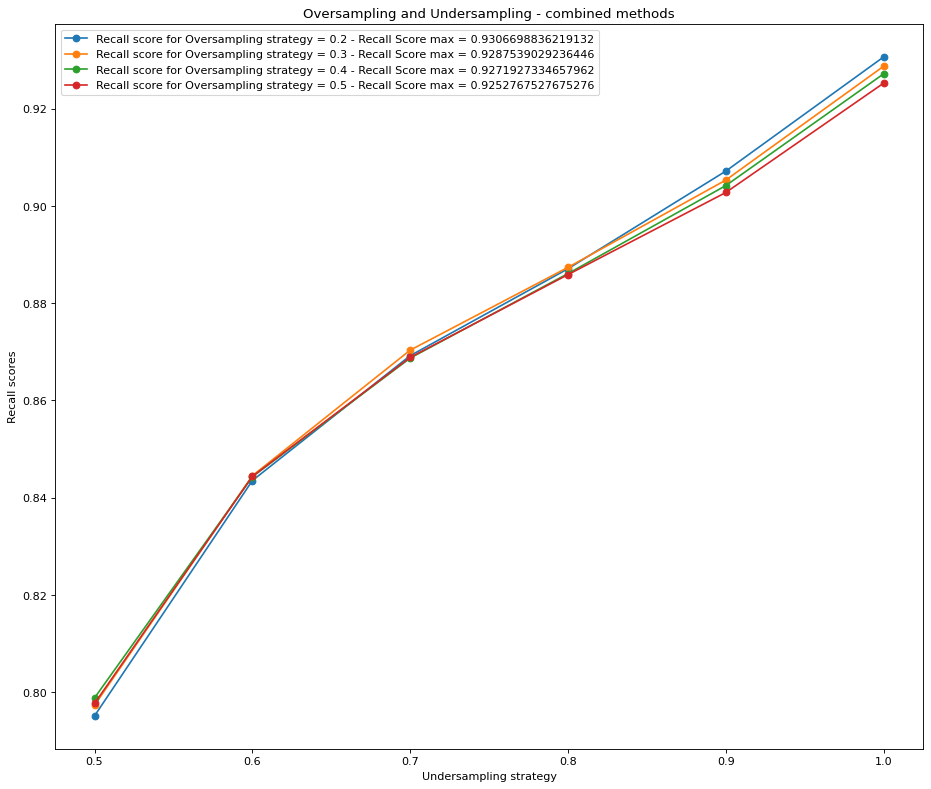

In [41]:
plot_recall_combined_sampling()

NOTES: It can be observed that through a combined Oversampling and Undersampling method a little higher recall score value can be reached:

        
Recall Score max - Over:     0.9278 (sampling strategy = 1.0)

Recall Score max - Under:    0.9263 (sampling strategy = 1.0)

Recall Score max - Combined: 0.9307 (sampling strategy = 0.2 Over & 1.0 Under)

**MODEL 6: LOGISTIC REGRESSION + OVERSAMPLING (SAMPLING STRATEGY = "MINORITY") + CLASS-WEIGHT BALANCED**

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

ros=RandomOverSampler(sampling_strategy="minority",random_state=0)
X_train,y_train=ros.fit_resample(X_train,y_train)

lr=LogisticRegression(class_weight="balanced")
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

*CONFUSION MATRIX*

TRAIN SET


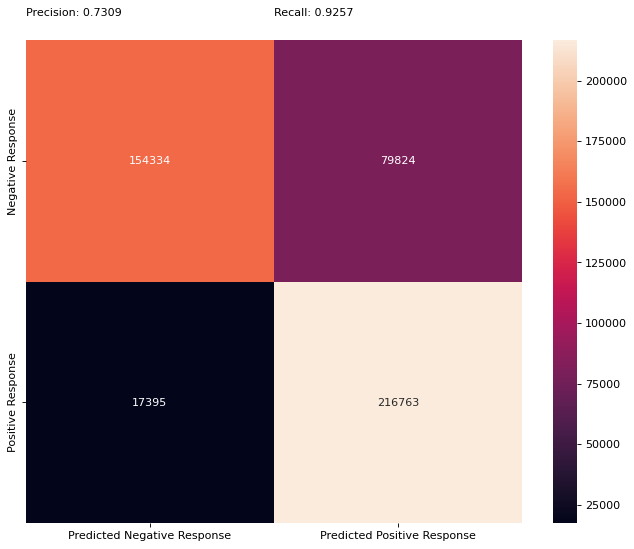

TEST SET


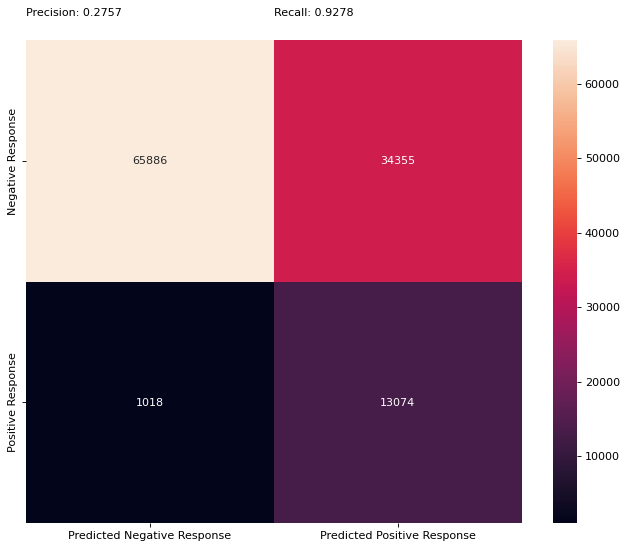

In [43]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

*CLASSIFICATION REPORT*

In [44]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

           0     0.8987    0.6591    0.7605    234158
           1     0.7309    0.9257    0.8168    234158

    accuracy                         0.7924    468316
   macro avg     0.8148    0.7924    0.7887    468316
weighted avg     0.8148    0.7924    0.7887    468316

TEST SET
              precision    recall  f1-score   support

           0     0.9848    0.6573    0.7884    100241
           1     0.2757    0.9278    0.4250     14092

    accuracy                         0.6906    114333
   macro avg     0.6302    0.7925    0.6067    114333
weighted avg     0.8974    0.6906    0.7436    114333



*ROC CURVE*

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


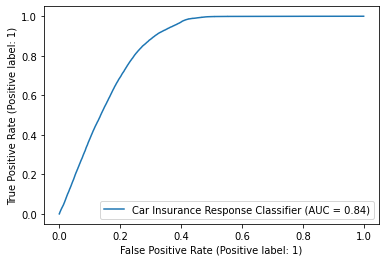

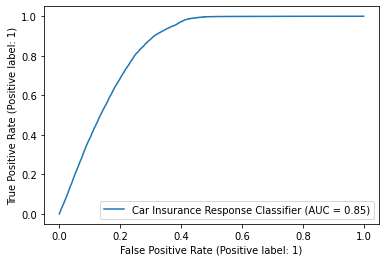

In [45]:
plot_roc_curve(lr,X_train,y_train, name="Car Insurance Response Classifier")
plot_roc_curve(lr,X_test,y_test, name="Car Insurance Response Classifier")

NOTES: It's quite evident that a combined method has no benefit on the scores.

Let's try to improve the scores one last time, looking at possible features with low correlation with the target/with high correlation with other features... 

**MODEL 7: MODEL 3 + DROP CORRELATED FEATURES**

<AxesSubplot:>

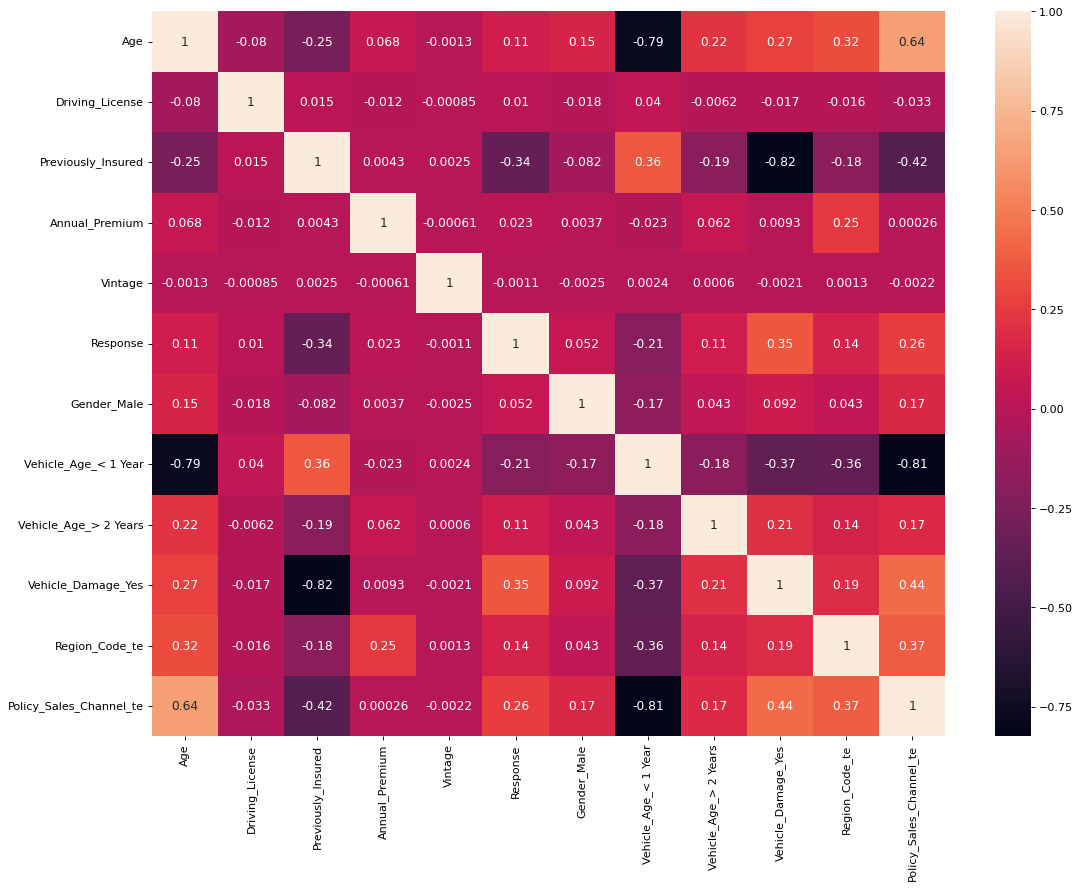

In [46]:
from matplotlib.pyplot import figure
figure(figsize=(16, 12), dpi=80)
sns.heatmap(df_train.corr(),annot=True,annot_kws={"size":11})

In [47]:
df_train=df_train.drop(["Vehicle_Age_< 1 Year","Vintage"],axis=1)
df_train.head()

,Age,Driving_License,Previously_Insured,Annual_Premium,Response,Gender_Male,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Region_Code_te,Policy_Sales_Channel_te
id,,,,,,,,,,
1,44,1,0,40454.0,1,1,1,1,0.187163,0.199385
2,76,1,0,33536.0,0,1,0,0,0.127662,0.199385
3,47,1,0,38294.0,1,1,1,1,0.187163,0.199385
4,21,1,1,28619.0,0,1,0,0,0.112760,0.028624
5,29,1,1,27496.0,0,0,0,0,0.121776,0.028624


In [48]:
X=df_train.drop("Response",axis=1).values
y=df_train["Response"].values

In [49]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

ros=RandomOverSampler(sampling_strategy="minority",random_state=0)
X_train,y_train=ros.fit_resample(X_train,y_train)

lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

TRAIN SET


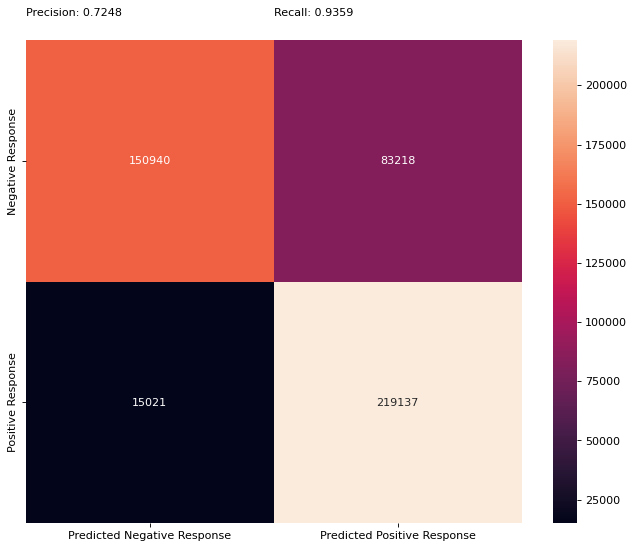

TEST SET


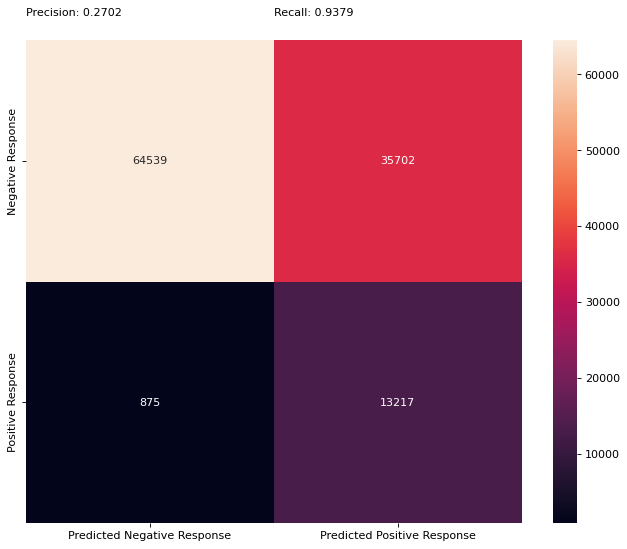

In [50]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

In [51]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

           0     0.9095    0.6446    0.7545    234158
           1     0.7248    0.9359    0.8169    234158

    accuracy                         0.7902    468316
   macro avg     0.8171    0.7902    0.7857    468316
weighted avg     0.8171    0.7902    0.7857    468316

TEST SET
              precision    recall  f1-score   support

           0     0.9866    0.6438    0.7792    100241
           1     0.2702    0.9379    0.4195     14092

    accuracy                         0.6801    114333
   macro avg     0.6284    0.7909    0.5994    114333
weighted avg     0.8983    0.6801    0.7349    114333



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


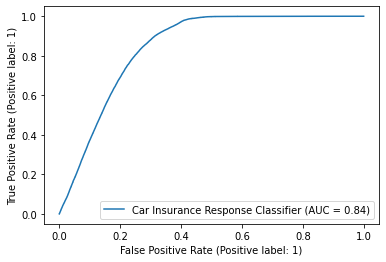

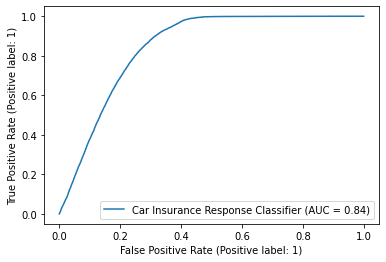

In [52]:
plot_roc_curve(lr,X_train,y_train, name="Car Insurance Response Classifier")
plot_roc_curve(lr,X_test,y_test, name="Car Insurance Response Classifier")

NOTES: The recall score has increased at 0.94, while the other scores have decreased:

Accuracy ≃ 0.68
Precision ≃ 0.27
Recall ≃ 0.94
F1 Score ≃ 0.42



**MODEL 8: MANUAL WEIGHTS' ASSIGNEMENT ON CLASSES**

In [77]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

lr=LogisticRegression(class_weight={0:12,1:100})
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

TRAIN SET


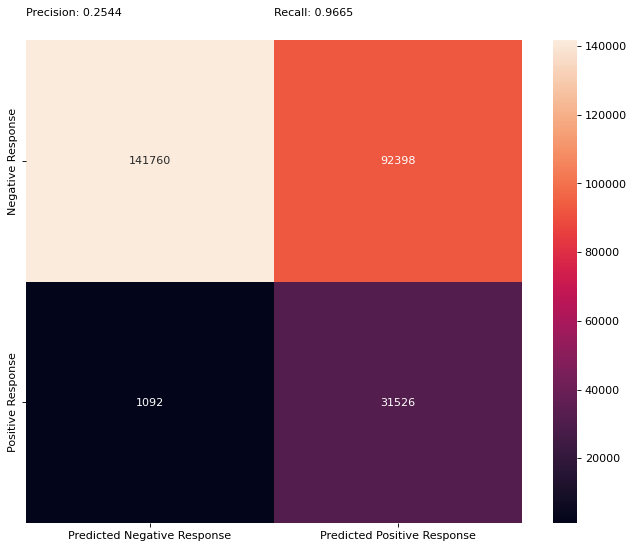

TEST SET


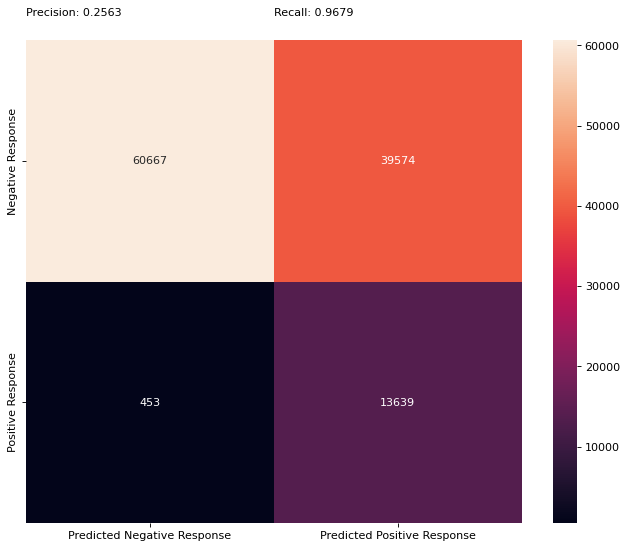

In [78]:
print("TRAIN SET")
plot_confusion_matrix(y_train,y_pred_train,show_precision_recall=True)
print("TEST SET")
plot_confusion_matrix(y_test,y_pred_test,show_precision_recall=True)

In [79]:
print("TRAIN SET")
print(classification_report(y_train,y_pred_train,digits=4))
print("TEST SET")
print(classification_report(y_test,y_pred_test,digits=4))

TRAIN SET
              precision    recall  f1-score   support

           0     0.9924    0.6054    0.7520    234158
           1     0.2544    0.9665    0.4028     32618

    accuracy                         0.6496    266776
   macro avg     0.6234    0.7860    0.5774    266776
weighted avg     0.9021    0.6496    0.7093    266776

TEST SET
              precision    recall  f1-score   support

           0     0.9926    0.6052    0.7519    100241
           1     0.2563    0.9679    0.4053     14092

    accuracy                         0.6499    114333
   macro avg     0.6244    0.7865    0.5786    114333
weighted avg     0.9018    0.6499    0.7092    114333



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


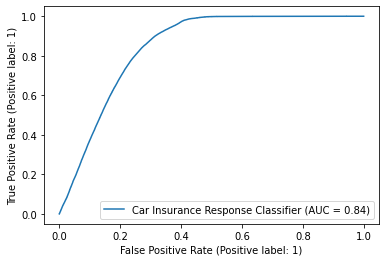

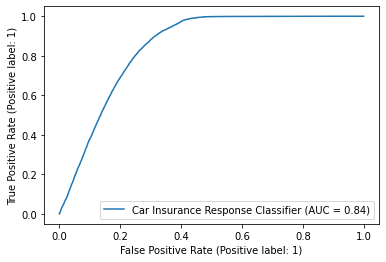

In [80]:
plot_roc_curve(lr,X_train,y_train, name="Car Insurance Response Classifier")
plot_roc_curve(lr,X_test,y_test, name="Car Insurance Response Classifier")

NOTES: With a manual weights' assignment on classes of 0.12 on the majority class and 1.0 on the minority class the highest recall is obtained, still mantaining acceptablen and not so different values for accuracy and precision. The recall score has increased at 0.97, while the other scores have decreased:

Accuracy ≃ 0.65
Precision ≃ 0.25
Recall ≃ 0.97
F1 Score ≃ 0.41

Reducing further the majority class weight a higher recall is returned, but precision (and so f1) and accuracy decrease a lot, leading to a worse model

**CONCLUSIONS:** 

* Model 1 (simple regression) shows the typical problems of imbalanced datasets;
* Model 2 (class-weight balanced) improves recall, the most significant score in this case (a manual approach may give even better values);
* Model 3 (oversampling, strategy = minority) shows similar results of model 2;
* Model 4 (undersampling, strategy = majority) shows similar results of model 3;
* Model 5 (oversampling + undersampling) shows a better recall score than model 3 and 4;
* Model 6 (oversampling + class-weight balanced) does not give a significant advantage to the model;
* Model 7 (model 3 + drop) returns a little higher recall, with the benefit of a lower set dimensionality too;
* Model 8 (manual weights) shows a higher recall at the expence of accuracy and precision;
* The ROC curve seems to be poorly affected by the different strategies chosen.